# APP SALUD #
* App Salud es un tipo de asociación público-privada, en la cual el estado peruano sede la gestión de una entidad de salud (hospital) a una empresa privada, con la finalidad de poder incrementar la calidad de la atención de los pacientes, mejorar las instalaciones y ser más eficientes en el uso de los recursos.

* El estado peruano sigue siendo el principal auditor de las actividades que realice la empresa privada que gestiona el hospital. Para ello, una manera de validar que los objetivos se están cumpliendo es a través de la encuesta de satisfacción que debe realizar el operador privado y rendir los resultados ante el estado peruano. Para renovar el contrato, el estado exige que la satisfacción general de los pacientes que se hayan atendido en algunos de los servicios que brinda el hospital esté por encima de 80%, así como otros umbrales mínimos que determinen la continuidad de la alianza.

* Los dos hospitales bajo esta modalidad de APP son: EsSalud Alberto Barton (Callao) y Guillermo Kaelin (Villa María del Triunfo-Lima).


## ANÁLSIIS EXPLORATORIO ###

> Agregar bloque entrecomillado


1. Vamos a analizar la data de satisfacción de los pacientes del servicio quirúrgico de los hospitales Barton Y KAELIN.

In [5]:

# Importación de librerías necesarias
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels openpyxl

# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # Importación corregida
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [3]:
# Carga del archivo desde la laptop
from google.colab import files
uploaded = files.upload()

Saving DATA DE SATISFACCIÓN HOSPITAL APP_SESIÓN 04.xlsx to DATA DE SATISFACCIÓN HOSPITAL APP_SESIÓN 04.xlsx


In [6]:
# Lectura del archivo Excel
df = pd.read_excel(list(uploaded.keys())[0], sheet_name='SAT HOSP_FEATURE')

In [7]:
# Omite la variable 'caso' en el análisis
df = df.drop(columns=['caso'])

In [8]:
# Vista preliminar de los datos
print("\n### Vista Preliminar del Dataset ###")
print(df.head())
print(df.info())


### Vista Preliminar del Dataset ###
   sat_general  sat1  sat2  sat3  sat4  sat5  sat6  sat7  sat8  hospital  \
0          5.0   5.0     5     5     5     4     5     3     5         1   
1          5.0   5.0     4     5     5     5     5     5     5         1   
2          5.0   5.0     5     5     5     5     5     5     5         2   
3          5.0   NaN     4     4     4     4     4     4     5         2   
4          5.0   5.0     5     5     5     5     5     5     5         2   

   medicion  sexo  edad  N_días_hosp  
0         3     1  43.0          8.0  
1         3     1  33.0         40.0  
2         3     1  33.0         34.0  
3         3     1   NaN         23.0  
4         3     1   NaN         25.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sat_general  674 non-null    float64
 1   sat1         646 non-null    float6

In [9]:
# Análisis Descriptivo
print("\n### Análisis Descriptivo ###")
print(df.describe())


### Análisis Descriptivo ###
       sat_general        sat1        sat2        sat3        sat4  \
count   674.000000  646.000000  686.000000  686.000000  686.000000   
mean      4.020772    4.210526    4.104956    4.214286    4.360058   
std       0.908691    0.705865    0.846153    0.775068    0.668439   
min       1.000000    1.000000    1.000000    1.000000    2.000000   
25%       4.000000    4.000000    4.000000    4.000000    4.000000   
50%       4.000000    4.000000    4.000000    4.000000    4.000000   
75%       5.000000    5.000000    5.000000    5.000000    5.000000   
max       5.000000    5.000000    5.000000    5.000000    5.000000   

             sat5        sat6        sat7        sat8    hospital    medicion  \
count  686.000000  686.000000  686.000000  686.000000  686.000000  686.000000   
mean     4.201166    4.046647    3.298834    4.074344    1.502915    3.498542   
std      0.861368    0.870026    1.089927    0.914768    0.500356    0.500363   
min      1.0000

In [10]:
# Análisis de valores faltantes
print("\n### Valores Faltantes ###")
print(df.isnull().sum())


### Valores Faltantes ###
sat_general    12
sat1           40
sat2            0
sat3            0
sat4            0
sat5            0
sat6            0
sat7            0
sat8            0
hospital        0
medicion        0
sexo            0
edad           18
N_días_hosp    11
dtype: int64


In [11]:
# Imputación de valores faltantes
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verificación de que no haya valores NaN o inf
print("\nVerificación de valores NaN o infinitos:")
print(df_imputed.isnull().sum().sum(), "NaN values")
print(np.isinf(df_imputed).sum().sum(), "Infinite values")


Verificación de valores NaN o infinitos:
0 NaN values
0 Infinite values


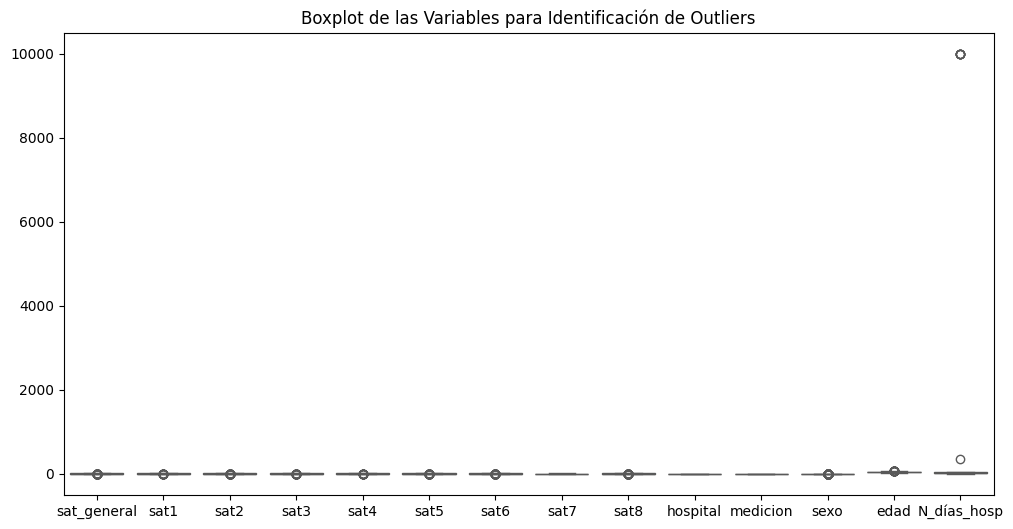

In [12]:
# Boxplot para identificar posibles outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['sat_general',  'sat1',  'sat2',  'sat3',  'sat4',  'sat5',  'sat6',  'sat7',  'sat8',  'hospital', 'medicion',  'sexo',  'edad',  'N_días_hosp']], palette="Set2")
plt.title('Boxplot de las Variables para Identificación de Outliers')
plt.show()

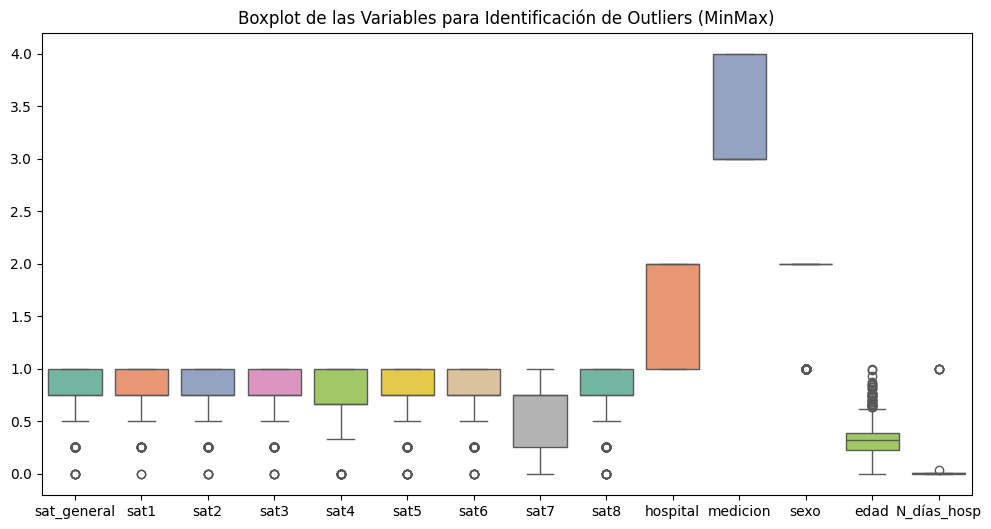

In [13]:
# prompt: Mofifica el código aplicando la tranformación min-max para todas las variable y vuelve a correr el boxplot. inicia a partir de: "# Boxplot para identificar posibles outliers
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[['sat_general',  'sat1',  'sat2',  'sat3',  'sat4',  'sat5',  'sat6',  'sat7',  'sat8',  'hospital', 'medicion',  'sexo',  'edad',  'N_días_hosp']], palette="Set2")
# plt.title('Boxplot de las Variables para Identificación de Outliers')
# plt.show()"

# Boxplot para identificar posibles outliers
from sklearn.preprocessing import MinMaxScaler

# Selecciona las columnas numéricas para la transformación
numerical_cols = ['sat_general', 'sat1', 'sat2', 'sat3', 'sat4', 'sat5', 'sat6', 'sat7', 'sat8', 'edad', 'N_días_hosp']

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta y transforma las columnas numéricas
df_scaled = df_imputed.copy()  # Crea una copia para evitar modificar el DataFrame original
df_scaled[numerical_cols] = scaler.fit_transform(df_imputed[numerical_cols])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[['sat_general',  'sat1',  'sat2',  'sat3',  'sat4',  'sat5',  'sat6',  'sat7',  'sat8',  'hospital', 'medicion',  'sexo',  'edad',  'N_días_hosp']], palette="Set2")
plt.title('Boxplot de las Variables para Identificación de Outliers (MinMax)')
plt.show()

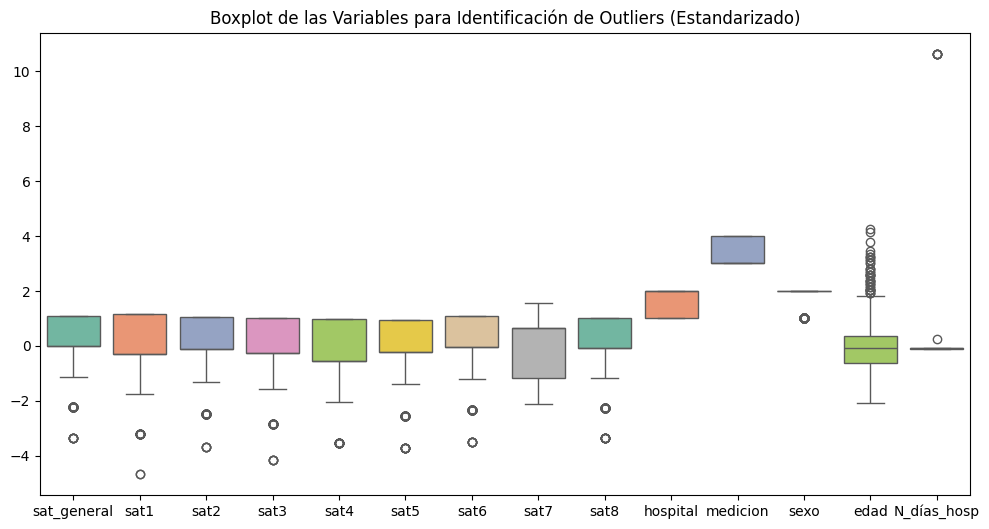

In [14]:
# prompt: ahora usando estandarización a partir de: # Boxplot para identificar posibles outliers
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[['sat_general',  'sat1',  'sat2',  'sat3',  'sat4',  'sat5',  'sat6',  'sat7',  'sat8',  'hospital', 'medicion',  'sexo',  'edad',  'N_días_hosp']], palette="Set2")
# plt.title('Boxplot de las Variables para Identificación de Outliers')
# plt.show()

# ... (Your existing code)

# Selecciona las columnas numéricas para la estandarización
numerical_cols = ['sat_general', 'sat1', 'sat2', 'sat3', 'sat4', 'sat5', 'sat6', 'sat7', 'sat8', 'edad', 'N_días_hosp']

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma las columnas numéricas
df_standardized = df_imputed.copy()  # Crea una copia para evitar modificar el DataFrame original
df_standardized[numerical_cols] = scaler.fit_transform(df_imputed[numerical_cols])

# Crea el boxplot para los datos estandarizados
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized[['sat_general', 'sat1', 'sat2', 'sat3', 'sat4', 'sat5', 'sat6', 'sat7', 'sat8', 'hospital', 'medicion', 'sexo', 'edad', 'N_días_hosp']], palette="Set2")
plt.title('Boxplot de las Variables para Identificación de Outliers (Estandarizado)')
plt.show()


### Distribución de la variable dependiente 'sat_general' ###


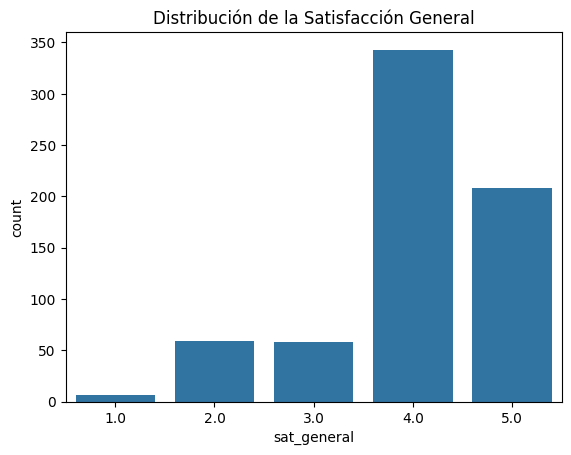

In [15]:
# Análisis exploratorio de la variable dependiente 'sat_general'
print("\n### Distribución de la variable dependiente 'sat_general' ###")
sns.countplot(x='sat_general', data=df)
plt.title('Distribución de la Satisfacción General')
plt.show()


### Matriz de Correlación ###


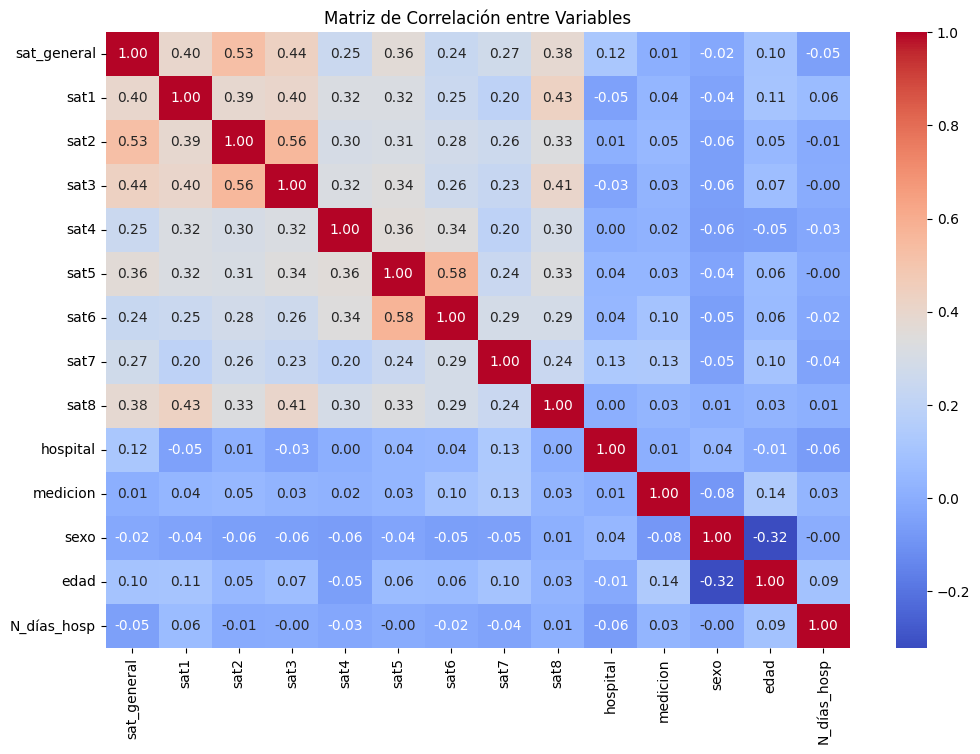

In [16]:
# Análisis de correlaciones
print("\n### Matriz de Correlación ###")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.show()

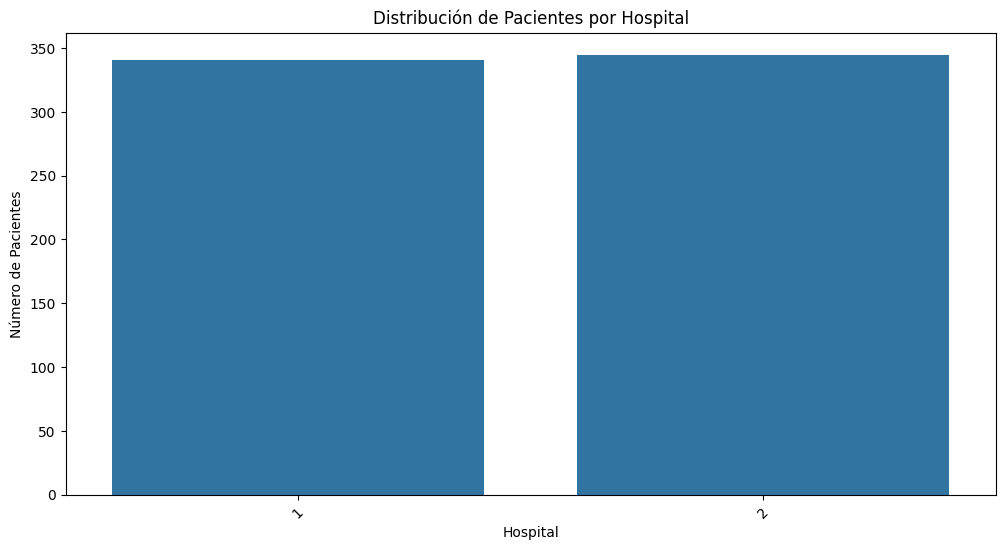

In [17]:
# Gráfico de distribución por hospital
plt.figure(figsize=(12, 6))
sns.countplot(x='hospital', data=df)
plt.title('Distribución de Pacientes por Hospital')
plt.xlabel('Hospital')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Conversión de la variable 'sat_general': 1-4 a 0, 5 a 1
df['sat_general_binary'] = df['sat_general'].apply(lambda x: 1 if x == 5 else 0)

# Mostrar las primeras filas de 'sat_general_binary' después de la conversión
print("Primeras filas de 'sat_general_binary' después de la conversión:")
print(df[['sat_general', 'sat_general_binary']].head())

Primeras filas de 'sat_general_binary' después de la conversión:
   sat_general  sat_general_binary
0          5.0                   1
1          5.0                   1
2          5.0                   1
3          5.0                   1
4          5.0                   1



Columna 'sat_general_binary' creada correctamente.


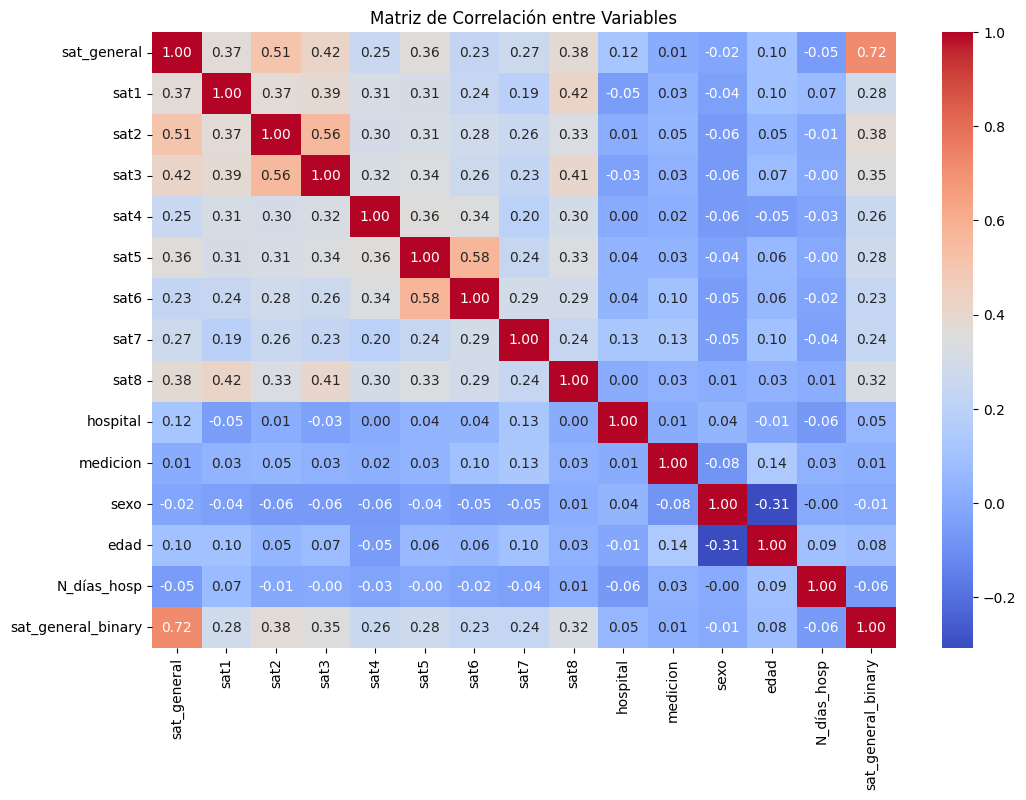

In [19]:
# Verificar si 'sat_general' existe antes de convertirla
if 'sat_general' in df_imputed.columns:
    df_imputed['sat_general_binary'] = df_imputed['sat_general'].apply(lambda x: 1 if x == 5 else 0)
    print("\nColumna 'sat_general_binary' creada correctamente.")
else:
    print("\nError: La columna 'sat_general' no existe en el DataFrame. Verifica los datos de entrada.")
    # Mostrar las columnas disponibles para diagnosticar el problema
    print("Columnas disponibles:", df_imputed.columns)

# Verificar si 'sat_general_binary' se ha creado antes de continuar
if 'sat_general_binary' in df_imputed.columns:
    # Matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de Correlación entre Variables')
    plt.show()

In [20]:
# Análisis de valores faltantes
print("\n### Valores Faltantes ###")
print(df.isnull().sum())


### Valores Faltantes ###
sat_general           12
sat1                  40
sat2                   0
sat3                   0
sat4                   0
sat5                   0
sat6                   0
sat7                   0
sat8                   0
hospital               0
medicion               0
sexo                   0
edad                  18
N_días_hosp           11
sat_general_binary     0
dtype: int64



### Distribución de la variable dependiente 'sat_general_binary' ###


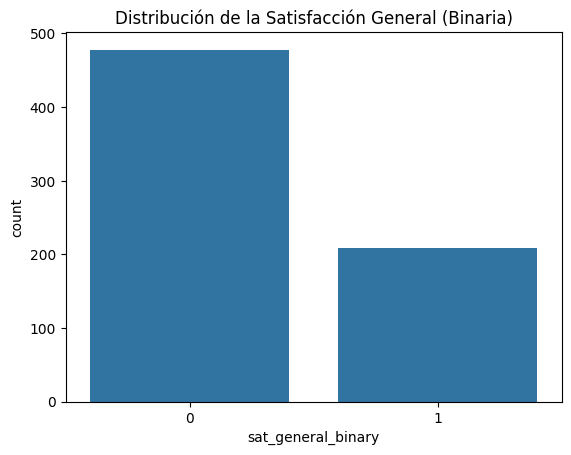

In [21]:
# Análisis exploratorio de la variable dependiente 'sat_general_binary'
print("\n### Distribución de la variable dependiente 'sat_general_binary' ###")
sns.countplot(x='sat_general_binary', data=df)
plt.title('Distribución de la Satisfacción General (Binaria)')
plt.show()

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Cargar los datos desde el archivo Excel en Google Colab
file_path = next(iter(uploaded))
df = pd.read_excel(file_path, sheet_name='SAT HOSP')

# Definir las variables independientes (X) y la variable dependiente (y)
X = df[['sat1', 'sat2', 'sat3', 'sat4', 'sat5', 'sat6', 'sat7', 'sat8']]
y = df['sat_general']

# Imprime el DataFrame para ver los cambios
print(df)

      caso  sexo  edad  rango_edad  hospital  sat_general  sat1  sat2  sat3  \
0    17858     1    43           3         1            5     5     5     5   
1    17876     1    33           2         1            5     5     4     5   
2    17923     1    33           2         2            5     5     5     5   
3    18675     1    35           2         2            5     4     4     4   
4    18682     1    34           2         2            5     5     5     5   
..     ...   ...   ...         ...       ...          ...   ...   ...   ...   
681  18667     2    55           4         1            1     4     2     4   
682  18688     2    28           2         1            1     2     2     2   
683  20231     2    23           1         1            1     3     4     4   
684  20942     2    34           2         1            1     4     4     2   
685  20981     2    27           2         1            1     1     1     2   

     sat4  sat5  sat6  sat7  sat8  medicion  N_días

In [23]:
# Verificar si hay valores faltantes o infinitos en X
print("Valores faltantes en X:", np.isnan(X).sum())
print("Valores infinitos en X:", np.isinf(X).sum())

# Eliminar filas con valores faltantes o infinitos en X
X = X[~np.isnan(X).any(axis=1)]
X = X[~np.isinf(X).any(axis=1)]

# También ajustar y para mantener consistencia en las filas
y = y.loc[X.index]


Valores faltantes en X: sat1    0
sat2    0
sat3    0
sat4    0
sat5    0
sat6    0
sat7    0
sat8    0
dtype: int64
Valores infinitos en X: sat1    0
sat2    0
sat3    0
sat4    0
sat5    0
sat6    0
sat7    0
sat8    0
dtype: int64


In [24]:
# Reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [25]:
# Diagnóstico inicial de índices
print("Dimensiones iniciales de X:", X.shape)
print("Dimensiones iniciales de y:", y.shape)

# Identificar índices no coincidentes
print("Índices únicos en y pero no en X:", set(y.index) - set(X.index))
print("Índices únicos en X pero no en y:", set(X.index) - set(y.index))

# Filtrar para mantener índices comunes
common_indices = X.index.intersection(y.index)
X = X.loc[common_indices]
y = y.loc[common_indices]

# Verificar alineación
print("Dimensiones después de la alineación:")
print("X:", X.shape, "| y:", y.shape)
assert X.index.equals(y.index), "Los índices de X e y no están alineados"

# Agregar un término constante y ajustar el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X)
model_fit = model.fit()

# Resultados
print("\n### Resultados del Modelo ###")
print("Coeficientes:")
print(model_fit.params)
print("\nP-valores:")
print(model_fit.pvalues)
print("\nResumen del Modelo:")
print(model_fit.summary())


Dimensiones iniciales de X: (686, 8)
Dimensiones iniciales de y: (686,)
Índices únicos en y pero no en X: set()
Índices únicos en X pero no en y: set()
Dimensiones después de la alineación:
X: (686, 8) | y: (686,)

### Resultados del Modelo ###
Coeficientes:
const    0.009237
sat1     0.202099
sat2     0.335292
sat3     0.150607
sat4    -0.037352
sat5     0.142427
sat6    -0.032728
sat7     0.090481
sat8     0.128782
dtype: float64

P-valores:
const    9.682067e-01
sat1     1.793428e-05
sat2     3.051543e-15
sat3     1.169111e-03
sat4     4.277663e-01
sat5     6.717924e-04
sat6     4.187591e-01
sat7     1.029738e-03
sat8     3.641028e-04
dtype: float64

Resumen del Modelo:
                            OLS Regression Results                            
Dep. Variable:            sat_general   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     56.14
Da

In [ ]:
print("Primeros índices de X:", X.index[:5])
print("Primeros índices de y:", y.index[:5])


Primeros índices de X: Index([0, 1, 2, 3, 4], dtype='int64')
Primeros índices de y: Index([0, 1, 2, 3, 4], dtype='int64')


In [26]:
# REGRESIÓN LOGÍSTICA: SATISFACCIÓN DE PACIENTES EN ÁREA DE HOSPITALIZACIÓN
# Este script realiza análisis estadístico y ajuste de un modelo logístico para evaluar factores de satisfacción.

# Importación de librerías necesarias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.diagnostic as smd

In [27]:
### 1. RECODIFICACIÓN DE LA VARIABLE DEPENDIENTE ###
# Asegurarnos de que no haya valores inesperados y recodificar SG_R
if 'SG_R' not in df.columns:
    df['SG_R'] = df['sat_general'].apply(lambda x: 1 if x == 5 else 0)

print("Distribución de la variable dependiente recodificada SG_R:")
print(df['SG_R'].value_counts())

Distribución de la variable dependiente recodificada SG_R:
SG_R
0    476
1    210
Name: count, dtype: int64


In [28]:
### 2. SELECCIÓN DE VARIABLES ###
# Variables independientes (satisfacción de diferentes aspectos) y dependiente
X = df[['sat1', 'sat2', 'sat3', 'sat4', 'sat5', 'sat6', 'sat7', 'sat8']]
y = df['SG_R']

# Agregar un término constante (intercepto)
X = sm.add_constant(X)

In [29]:
### 3. MODELO DE REGRESIÓN LOGÍSTICA ###
# Verificar valores faltantes e infinitos en X
print("Valores faltantes en X:", X.isnull().sum().sum())
print("Valores infinitos en X:", np.isinf(X).sum().sum())

# Imputar valores faltantes con la media
X.fillna(X.mean(), inplace=True)

# Reemplazar infinitos por valores altos razonables
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Revisar nuevamente
print("Valores faltantes después del procesamiento:", X.isnull().sum().sum())
print("Valores infinitos después del procesamiento:", np.isinf(X).sum().sum())

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
logit_fit = logit_model.fit()

# Resumen del modelo
print("\n### Resumen del Modelo ###")
print(logit_fit.summary())

Valores faltantes en X: 0
Valores infinitos en X: 0
Valores faltantes después del procesamiento: 0
Valores infinitos después del procesamiento: 0
Optimization terminated successfully.
         Current function value: 0.481434
         Iterations 7

### Resumen del Modelo ###
                           Logit Regression Results                           
Dep. Variable:                   SG_R   No. Observations:                  686
Model:                          Logit   Df Residuals:                      677
Method:                           MLE   Df Model:                            8
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                  0.2184
Time:                        17:09:13   Log-Likelihood:                -330.26
converged:                       True   LL-Null:                       -422.55
Covariance Type:            nonrobust   LLR p-value:                 1.126e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

In [30]:
### 4. PROBABILIDADES PREDICHAS ###
# Obtener probabilidades predichas
predicted_probs = logit_fit.predict(X) # This line defines 'predicted_probs'
df['Predicted_Probs'] = predicted_probs

print("\n### Probabilidades Predichas (Primeros 5 registros) ###")
print(df[['Predicted_Probs', 'SG_R']].head())


### Probabilidades Predichas (Primeros 5 registros) ###
   Predicted_Probs  SG_R
0         0.605647     1
1         0.638647     1
2         0.764400     1
3         0.274114     1
4         0.764400     1


In [31]:
### 5. DIAGNÓSTICO DEL MODELO ###

# 5.1. Matriz de correlaciones
print("\n### Matriz de Correlaciones ###")
print(X.corr())

# Importación necesaria para realizar el test de normalidad
from scipy.stats import shapiro

# 5.2. Prueba de normalidad (residuos)
residuos = y - predicted_probs
shapiro_test = shapiro(residuos)

print("\n### Test de Normalidad (Shapiro-Wilk) ###")
print("Estadístico:", shapiro_test.statistic, "p-valor:", shapiro_test.pvalue)

if shapiro_test.pvalue > 0.05:
    print("Los residuos siguen una distribución normal (no se rechaza H0).")
else:
    print("Los residuos no siguen una distribución normal (se rechaza H0).")



### Matriz de Correlaciones ###
       const      sat1      sat2      sat3      sat4      sat5      sat6  \
const    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
sat1     NaN  1.000000  0.402803  0.399401  0.307266  0.330550  0.265393   
sat2     NaN  0.402803  1.000000  0.559992  0.302180  0.311492  0.280878   
sat3     NaN  0.399401  0.559992  1.000000  0.318611  0.339869  0.264427   
sat4     NaN  0.307266  0.302180  0.318611  1.000000  0.355757  0.340083   
sat5     NaN  0.330550  0.311492  0.339869  0.355757  1.000000  0.575756   
sat6     NaN  0.265393  0.280878  0.264427  0.340083  0.575756  1.000000   
sat7     NaN  0.207457  0.257202  0.233419  0.196747  0.242204  0.291639   
sat8     NaN  0.425574  0.329391  0.405772  0.295179  0.333009  0.289121   

           sat7      sat8  
const       NaN       NaN  
sat1   0.207457  0.425574  
sat2   0.257202  0.329391  
sat3   0.233419  0.405772  
sat4   0.196747  0.295179  
sat5   0.242204  0.333009  
sat6   0.2

In [32]:
# 5.3. Multicolinealidad (VIF)
# Importar variance_inflation_factor si no está ya importado
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el factor de inflación de la varianza (VIF)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprimir los resultados del VIF
print("\n### Factor de Inflación de la Varianza (VIF) ###")
print(vif)

# Interpretación del VIF
print("\nInterpretación: Si VIF > 5, existe multicolinealidad significativa.")



### Factor de Inflación de la Varianza (VIF) ###
  Variable        VIF
0    const  69.675442
1     sat1   1.425178
2     sat2   1.599741
3     sat3   1.662091
4     sat4   1.283589
5     sat5   1.671564
6     sat6   1.605814
7     sat7   1.160230
8     sat8   1.401586

Interpretación: Si VIF > 5, existe multicolinealidad significativa.


In [33]:
# Importar el módulo si no está ya importado
import statsmodels.stats.diagnostic as smd

# Calcular los residuos estandarizados
std_residuos = residuos / np.sqrt(predicted_probs * (1 - predicted_probs))

# Realizar el test de Breusch-Pagan para verificar la homocedasticidad
bp_test = smd.het_breuschpagan(std_residuos, X)

# Imprimir el resultado del test
print("\n### Test de Homocedasticidad (Breusch-Pagan) ###")
print("Estadístico:", bp_test[0])
print("p-valor:", bp_test[1])

# Interpretación del resultado
if bp_test[1] > 0.05:
    print("Los residuos son homocedásticos (no se rechaza H0).")
else:
    print("Los residuos no son homocedásticos (se rechaza H0).")



### Test de Homocedasticidad (Breusch-Pagan) ###
Estadístico: 22.52402354836845
p-valor: 0.004032236340117721
Los residuos no son homocedásticos (se rechaza H0).
